# converting superstar files

In [1]:
import dotenv

# load in environment variables
dotenv.load_dotenv()

import datetime as dt
import magicpy.analysis as analysis
import magicpy.datalevel as dl
import magicpy.periods as periods
import magicpy.moons as moons
import magicpy.zeniths as zeniths

from pandarallel import pandarallel
pandarallel.initialize(nb_workers=200)
import uproot
import numpy as np
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

import sys

magicdl_path = Path("/home/iwsatlas1/jgreen/DHBW/magicdl").absolute()
# sys.path.append(str(Path(".").absolute().parent / "magicdl"))
sys.path.append(str(magicdl_path))
import convert

INFO: Pandarallel will run on 200 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


## gammas

In [2]:
mc = analysis.MC(
    period=periods.ST0307,
    zenith=zeniths.za05to35,
)

Loading existing analysis from /remote/magicdata5/jgreen/MAGICPY_ANALYSIS/MC/ST0307/MC_ST0307_za05to35_None.magicpy
INFO: RFs not found for: ST0307 za05to35 weak moon.
INFO: RFs not found for: ST0307 za05to35 moderate moon.
INFO: RFs not found for: ST0307 za05to35 decent moon.
INFO: RFs not found for: ST0307 za05to35 strong moon.
INFO: RFs not found for: ST0307 za05to35 high moon.
INFO: RFs not found for: ST0307 za05to35 super moon.
INFO: RFs not found for: ST0307 za05to35 reduced_decent moon.
INFO: RFs not found for: ST0307 za05to35 reduced_strong moon.
INFO: RFs not found for: ST0307 za05to35 reduced_high moon.


In [42]:
mc._runs

,run_number,period,zenith,telescope_number,data_level,moon_level,pic_path,local_path,split
index,,,,,,,,,
821319_weak_Calibrated_M1,821319,ST0307,za05to35,1,Calibrated_M1,weak,/Data/MonteCarlo_Stereo/M1_DRS4_1039_M2_DRS4_1...,/remote/magicdata5/jgreen/MAGICPY_ANALYSIS/MC/...,None
821320_weak_Calibrated_M1,821320,ST0307,za05to35,1,Calibrated_M1,weak,/Data/MonteCarlo_Stereo/M1_DRS4_1039_M2_DRS4_1...,/remote/magicdata5/jgreen/MAGICPY_ANALYSIS/MC/...,None
821321_weak_Calibrated_M1,821321,ST0307,za05to35,1,Calibrated_M1,weak,/Data/MonteCarlo_Stereo/M1_DRS4_1039_M2_DRS4_1...,/remote/magicdata5/jgreen/MAGICPY_ANALYSIS/MC/...,None
821322_weak_Calibrated_M1,821322,ST0307,za05to35,1,Calibrated_M1,weak,/Data/MonteCarlo_Stereo/M1_DRS4_1039_M2_DRS4_1...,/remote/magicdata5/jgreen/MAGICPY_ANALYSIS/MC/...,None
821323_weak_Calibrated_M1,821323,ST0307,za05to35,1,Calibrated_M1,weak,/Data/MonteCarlo_Stereo/M1_DRS4_1039_M2_DRS4_1...,/remote/magicdata5/jgreen/MAGICPY_ANALYSIS/MC/...,None
...,...,...,...,...,...,...,...,...,...
855615_weak_Calibrated_M2,855615,ST0307,za05to35,2,Calibrated_M2,weak,/Data/MonteCarlo_Stereo/M1_DRS4_1039_M2_DRS4_1...,/remote/magicdata5/jgreen/MAGICPY_ANALYSIS/MC/...,None
855616_weak_Calibrated_M2,855616,ST0307,za05to35,2,Calibrated_M2,weak,/Data/MonteCarlo_Stereo/M1_DRS4_1039_M2_DRS4_1...,/remote/magicdata5/jgreen/MAGICPY_ANALYSIS/MC/...,None
855617_weak_Calibrated_M2,855617,ST0307,za05to35,2,Calibrated_M2,weak,/Data/MonteCarlo_Stereo/M1_DRS4_1039_M2_DRS4_1...,/remote/magicdata5/jgreen/MAGICPY_ANALYSIS/MC/...,None


In [4]:
# point to MCs on scratch

old_path = "/remote/magicdata5/jgreen/MAGICPY_ANALYSIS/MC/ST0307/za05to35"
new_path = "/mnt/scratch/jgreen/MAGIC_MC/ST0307/za05to35"

# replace the old path with the new path in mc.runs.local_path dataframe
mc._runs["local_path_mnt"] = mc._runs.local_path.apply(
    lambda x: Path(str(x).replace(old_path, new_path)).absolute()
)

In [5]:
superstar_files = mc.runs[mc.runs.data_level == dl.SuperStar].local_path_mnt.to_list()
file_1 = superstar_files[0]
file_2 = superstar_files[1]

In [60]:
calib_m1 = mc._runs[mc._runs.data_level == dl.CalibratedM1]
calib_m2 = mc._runs[mc._runs.data_level == dl.CalibratedM2]

calib = pd.merge(calib_m1, calib_m2, on="run_number", suffixes=("_m1", "_m2"))

In [62]:
calib.columns

Index(['run_number', 'period_m1', 'zenith_m1', 'telescope_number_m1',
       'data_level_m1', 'moon_level_m1', 'pic_path_m1', 'local_path_m1',
       'split_m1', 'local_path_mnt_m1', 'period_m2', 'zenith_m2',
       'telescope_number_m2', 'data_level_m2', 'moon_level_m2', 'pic_path_m2',
       'local_path_m2', 'split_m2', 'local_path_mnt_m2'],
      dtype='object')

Question:
**What's the difference between 'Events;6' and 'Events;7' trees?**


Training params used in MARS BDTs:

- gamma/hadron separation variables:
```
RF.GHVariable1:  0.025+0.05*floor(log10(MHillas_1.fSize)/0.05)
RF.GHVariable2:  0.025+0.05*floor(log10(MHillas_2.fSize)/0.05)
RF.GHVariable3:  MHillas_1.fWidth
RF.GHVariable4:  MHillas_2.fWidth
RF.GHVariable5:  MHillas_1.fLength
RF.GHVariable6:  MHillas_2.fLength
RF.GHVariable7:  MStereoPar.fM1Impact
RF.GHVariable8:  MStereoPar.fM2Impact
RF.GHVariable9:  MStereoPar.fMaxHeight
RF.GHVariable10: sqrt(MHillasTimeFit_1.fP1Grad*MHillasTimeFit_1.fP1Grad)
RF.GHVariable11: sqrt(MHillasTimeFit_2.fP1Grad*MHillasTimeFit_2.fP1Grad)
RF.GHVariable12: (0.5/30.)+(1./30.)*floor(cos(MPointingPos_1.fZd*0.0174532925)/(1./30.))
```

- energy estimation variables
```
RFenStereo.Variable1:  log10(MHillas_1.fSize)
RFenStereo.Variable2:  log10(MHillas_2.fSize)
RFenStereo.Variable3:  MNewImagePar_1.fLeakage1
RFenStereo.Variable4:  MNewImagePar_1.fLeakage2
RFenStereo.Variable5:  MNewImagePar_2.fLeakage1
RFenStereo.Variable6:  MNewImagePar_2.fLeakage2
RFenStereo.Variable7:  sqrt(MHillasTimeFit_1.fP1Grad*MHillasTimeFit_1.fP1Grad)
RFenStereo.Variable8:  sqrt(MHillasTimeFit_2.fP1Grad*MHillasTimeFit_2.fP1Grad)
RFenStereo.Variable9:  MMcEvt_1.fImpact
RFenStereo.Variable10: MMcEvt_2.fImpact
RFenStereo.Variable11: MHillasSrc_1.fDist*0.0033703000000000001
RFenStereo.Variable12: MHillasSrc_2.fDist*0.0033703000000000001
RFenStereo.Variable13: MPointingPos_1.fZd
RFenStereo.Variable14: MStereoPar.fMaxHeight
RFenStereo.Variable15: MStereoPar.fCherenkovDensity
RFenStereo.Variable16: MStereoPar.fCherenkovRadius
RFenStereo.Variable17: MStereoPar.fCosBSangle
```

- stereo disp variabls
```
# Parameters for MAGIC1

RF.Disp1Variable1:  log10(MHillas_1.fSize) 
RF.Disp1Variable2:  log10(MHillas_2.fSize)
RF.Disp1Variable3:  MStereoPar.fM1Impact
RF.Disp1Variable4:  MStereoPar.fM2Impact
RF.Disp1Variable5:  MPointingPos_1.fZd
RF.Disp1Variable6:  MStereoPar.fMaxHeight
RF.Disp1Variable7:  sqrt(MHillasTimeFit_1.fP1Grad*MHillasTimeFit_1.fP1Grad)
RF.Disp1Variable8:  sqrt(MHillasTimeFit_2.fP1Grad*MHillasTimeFit_2.fP1Grad)
RF.Disp1Variable9:  MHillasDynamic_1.fWidth
RF.Disp1Variable10: MHillasDynamic_1.fLength
# This has to be the last one. It is the scaling parameter.
RF.Disp1Variable11: MHillasSrc_1.fDist*0.0033703

# and similar for MAGIC 2:

RF.Disp2Variable1:  log10(MHillas_1.fSize)
RF.Disp2Variable2:  log10(MHillas_2.fSize)
RF.Disp2Variable3:  MStereoPar.fM1Impact
RF.Disp2Variable4:  MStereoPar.fM2Impact
RF.Disp2Variable5:  MPointingPos_1.fZd
RF.Disp2Variable6:  MStereoPar.fMaxHeight
RF.Disp2Variable7:  sqrt(MHillasTimeFit_1.fP1Grad*MHillasTimeFit_1.fP1Grad)
RF.Disp2Variable8:  sqrt(MHillasTimeFit_2.fP1Grad*MHillasTimeFit_2.fP1Grad)
RF.Disp2Variable9:  MHillasDynamic_2.fWidth
RF.Disp2Variable10: MHillasDynamic_2.fLength
# This has to be the last one. It is the scaling parameter.
RF.Disp2Variable11: MHillasSrc_2.fDist*0.0033703
```

In [ ]:
f = uproot.open(file_1)
print("Keys:", f.keys())
n_events = len(f[ 'Events;7/MHillas_1./MHillas_1.fLength'].array())
print(f"Number of events: {n_events}")

event_info = [
    'Events;7/MMcEvt_1./MMcEvt_1.fEvtNumber',
    'Events;7/MMcEvt_1./MMcEvt_1.fEnergy',
    'Events;7/MMcEvt_1./MMcEvt_1.fTheta',
    'Events;7/MMcEvt_1./MMcEvt_1.fPhi',
    'Events;7/MMcEvt_1./MMcEvt_1.fTelescopeTheta',
    'Events;7/MMcEvt_1./MMcEvt_1.fTelescopePhi',
    'Events;7/MMcEvt_1./MMcEvt_1.fZFirstInteraction',
]

used_hillas = [
    'Events;7/MHillas_1./MHillas_1.fLength',
    'Events;7/MHillas_2./MHillas_2.fLength',
    'Events;7/MHillas_1./MHillas_1.fWidth',
    'Events;7/MHillas_2./MHillas_2.fWidth',
    'Events;7/MHillas_1./MHillas_1.fSize',
    'Events;7/MHillas_2./MHillas_2.fSize',
    # 'Events;7/MHillas_1./MHillas_1.fMeanX',
    # 'Events;7/MHillas_1./MHillas_1.fMeanY',
    # 'Events;7/MHillas_1./MHillas_1.fSinDelta',
    # 'Events;7/MHillas_1./MHillas_1.fCosDelta',
    # 'Events;7/MHillas_1./MHillas_1.fDelta',
    'Events;7/MStereoPar./MStereoPar.fM1Impact',
    'Events;7/MStereoPar./MStereoPar.fM2Impact',
    'Events;7/MStereoPar./MStereoPar.fMaxHeight',
    'Events;7/MStereoPar./MStereoPar.fCherenkovDensity',
    'Events;7/MStereoPar./MStereoPar.fCherenkovRadius',
    'Events;7/MStereoPar./MStereoPar.fCosBSangle',
    'Events;7/MHillasTimeFit_1./MHillasTimeFit_1.fP1Grad',
    'Events;7/MHillasTimeFit_2./MHillasTimeFit_2.fP1Grad',
    'Events;7/MPointingPos_1./MPointingPos_1.fZd',
    'Events;7/MNewImagePar_1./MNewImagePar_1.fLeakage1',
    'Events;7/MNewImagePar_1./MNewImagePar_1.fLeakage2',
    'Events;7/MNewImagePar_2./MNewImagePar_1.fLeakage1',
    'Events;7/MNewImagePar_2./MNewImagePar_1.fLeakage2',
    'Events;7/MMcEvt_1./MMcEvt_1.fImpact',
    'Events;7/MMcEvt_2./MMcEvt_2.fImpact',
    'Events;7/MHillasSrc_1./MHillasSrc_1.fDist',
    'Events;7/MHillasSrc_2./MHillasSrc_2.fImpact',
    # 'Events;7/MHillasDynamic_1./MHillasDynamic_1.fWidth',
    # 'Events;7/MHillasDynamic_1./MHillasDynamic_1.fLength',
    # 'Events;7/MHillasDynamic_2./MHillasDynamic_2.fWidth',
    # 'Events;7/MHillasDynamic_2./MHillasDynamic_2.fLength',
]

all_params = [
    "Events;7/MHillas_1./MHillas_1.fLength",
    "Events;7/MHillas_1./MHillas_1.fWidth",
    "Events;7/MHillas_1./MHillas_1.fDelta",
    "Events;7/MHillas_1./MHillas_1.fSize",
    "Events;7/MHillas_1./MHillas_1.fMeanX",
    "Events;7/MHillas_1./MHillas_1.fMeanY",
    "Events;7/MHillas_1./MHillas_1.fSinDelta",
    "Events;7/MHillas_1./MHillas_1.fCosDelta",
    "Events;7/MHillas_2./MHillas_2.fLength",
    "Events;7/MHillas_2./MHillas_2.fWidth",
    "Events;7/MHillas_2./MHillas_2.fDelta",
    "Events;7/MHillas_2./MHillas_2.fSize",
    "Events;7/MHillas_2./MHillas_2.fMeanX",
    "Events;7/MHillas_2./MHillas_2.fMeanY",
    "Events;7/MHillas_2./MHillas_2.fSinDelta",
    "Events;7/MHillas_2./MHillas_2.fCosDelta",
    "Events;7/MStereoPar./MStereoPar.fDirectionX",
    "Events;7/MStereoPar./MStereoPar.fDirectionY",
    "Events;7/MStereoPar./MStereoPar.fDirectionZd",
    "Events;7/MStereoPar./MStereoPar.fDirectionAz",
    "Events;7/MStereoPar./MStereoPar.fDirectionDec",
    "Events;7/MStereoPar./MStereoPar.fDirectionRA",
    "Events;7/MStereoPar./MStereoPar.fTheta2",
    "Events;7/MStereoPar./MStereoPar.fCoreX",
    "Events;7/MStereoPar./MStereoPar.fCoreY",
    "Events;7/MStereoPar./MStereoPar.fM1Impact",
    "Events;7/MStereoPar./MStereoPar.fM2Impact",
    "Events;7/MStereoPar./MStereoPar.fM1ImpactAz",
    "Events;7/MStereoPar./MStereoPar.fM2ImpactAz",
    "Events;7/MStereoPar./MStereoPar.fMaxHeight",
    "Events;7/MStereoPar./MStereoPar.fXMax",
    "Events;7/MStereoPar./MStereoPar.fCherenkovRadius",
    "Events;7/MStereoPar./MStereoPar.fCherenkovDensity",
    # "Events;7/MStereoPar./MStereoPar.fEnergy",
    # "Events;7/MStereoPar./MStereoPar.fEnergyUncertainty",
    # "Events;7/MStereoPar./MStereoPar.fEnergyDiscrepancy",
    "Events;7/MStereoPar./MStereoPar.fPhiBaseLineM1",
    "Events;7/MStereoPar./MStereoPar.fPhiBaseLineM2",
    "Events;7/MStereoPar./MStereoPar.fImageAngle",
    # "Events;7/MStereoPar./MStereoPar.fDispRMS",
    # "Events;7/MStereoPar./MStereoPar.fDispDiff2",
    "Events;7/MStereoPar./MStereoPar.fCosBSangle",
    "Events;7/MPointingPos_2./MPointingPos_2.fZd",
    "Events;7/MPointingPos_2./MPointingPos_2.fAz",
    'Events;7/MHillasTimeFit_1./MHillasTimeFit_1.fP1Grad',
    'Events;7/MHillasTimeFit_2./MHillasTimeFit_2.fP1Grad',
    'Events;7/MMcEvt_1./MMcEvt_1.fImpact',
    'Events;7/MMcEvt_2./MMcEvt_2.fImpact',
    "Events;7/MHillasSrc_1./MHillasSrc_1.fAlpha",
    "Events;7/MHillasSrc_1./MHillasSrc_1.fDist",
    "Events;7/MHillasSrc_1./MHillasSrc_1.fCosDeltaAlpha",
    "Events;7/MHillasSrc_1./MHillasSrc_1.fDCA",
    "Events;7/MHillasSrc_1./MHillasSrc_1.fDCADelta",
]


Keys: ['Events;7', 'Events;6', 'RunHeaders;1', 'RunTails;1', 'OriginalMC;5', 'OriginalMC;4']
Number of events: 185290


In [6]:
def extract_superstar_mc(filepath: Path | str, verbose: bool = False) -> dict:
    
    filepath = Path(filepath).absolute()
    
    params = [
        'Events;7/MMcEvt_1./MMcEvt_1.fEvtNumber',
        'Events;7/MMcEvt_1./MMcEvt_1.fEnergy',
        'Events;7/MMcEvt_1./MMcEvt_1.fTheta',
        'Events;7/MMcEvt_1./MMcEvt_1.fPhi',
        'Events;7/MMcEvt_1./MMcEvt_1.fTelescopeTheta',
        'Events;7/MMcEvt_1./MMcEvt_1.fTelescopePhi',
        'Events;7/MMcEvt_1./MMcEvt_1.fZFirstInteraction',
        'Events;7/MMcEvt_2./MMcEvt_2.fEvtNumber',
        'Events;7/MMcEvt_2./MMcEvt_2.fEnergy',
        'Events;7/MMcEvt_2./MMcEvt_2.fTheta',
        'Events;7/MMcEvt_2./MMcEvt_2.fPhi',
        'Events;7/MMcEvt_2./MMcEvt_2.fTelescopeTheta',
        'Events;7/MMcEvt_2./MMcEvt_2.fTelescopePhi',
        'Events;7/MMcEvt_2./MMcEvt_2.fZFirstInteraction',
        "Events;7/MHillas_1./MHillas_1.fLength",
        "Events;7/MHillas_1./MHillas_1.fWidth",
        "Events;7/MHillas_1./MHillas_1.fDelta",
        "Events;7/MHillas_1./MHillas_1.fSize",
        "Events;7/MHillas_1./MHillas_1.fMeanX",
        "Events;7/MHillas_1./MHillas_1.fMeanY",
        "Events;7/MHillas_1./MHillas_1.fSinDelta",
        "Events;7/MHillas_1./MHillas_1.fCosDelta",
        "Events;7/MHillas_2./MHillas_2.fLength",
        "Events;7/MHillas_2./MHillas_2.fWidth",
        "Events;7/MHillas_2./MHillas_2.fDelta",
        "Events;7/MHillas_2./MHillas_2.fSize",
        "Events;7/MHillas_2./MHillas_2.fMeanX",
        "Events;7/MHillas_2./MHillas_2.fMeanY",
        "Events;7/MHillas_2./MHillas_2.fSinDelta",
        "Events;7/MHillas_2./MHillas_2.fCosDelta",
        "Events;7/MStereoPar./MStereoPar.fDirectionX",
        "Events;7/MStereoPar./MStereoPar.fDirectionY",
        "Events;7/MStereoPar./MStereoPar.fDirectionZd",
        "Events;7/MStereoPar./MStereoPar.fDirectionAz",
        "Events;7/MStereoPar./MStereoPar.fDirectionDec",
        "Events;7/MStereoPar./MStereoPar.fDirectionRA",
        "Events;7/MStereoPar./MStereoPar.fTheta2",
        "Events;7/MStereoPar./MStereoPar.fCoreX",
        "Events;7/MStereoPar./MStereoPar.fCoreY",
        "Events;7/MStereoPar./MStereoPar.fM1Impact",
        "Events;7/MStereoPar./MStereoPar.fM2Impact",
        "Events;7/MStereoPar./MStereoPar.fM1ImpactAz",
        "Events;7/MStereoPar./MStereoPar.fM2ImpactAz",
        "Events;7/MStereoPar./MStereoPar.fMaxHeight",
        "Events;7/MStereoPar./MStereoPar.fXMax",
        "Events;7/MStereoPar./MStereoPar.fCherenkovRadius",
        "Events;7/MStereoPar./MStereoPar.fCherenkovDensity",
        # "Events;7/MStereoPar./MStereoPar.fEnergy",
        # "Events;7/MStereoPar./MStereoPar.fEnergyUncertainty",
        # "Events;7/MStereoPar./MStereoPar.fEnergyDiscrepancy",
        "Events;7/MStereoPar./MStereoPar.fPhiBaseLineM1",
        "Events;7/MStereoPar./MStereoPar.fPhiBaseLineM2",
        "Events;7/MStereoPar./MStereoPar.fImageAngle",
        # "Events;7/MStereoPar./MStereoPar.fDispRMS",
        # "Events;7/MStereoPar./MStereoPar.fDispDiff2",
        "Events;7/MStereoPar./MStereoPar.fCosBSangle",
        "Events;7/MPointingPos_2./MPointingPos_2.fZd",
        "Events;7/MPointingPos_2./MPointingPos_2.fAz",
        'Events;7/MHillasTimeFit_1./MHillasTimeFit_1.fP1Grad',
        'Events;7/MHillasTimeFit_2./MHillasTimeFit_2.fP1Grad',
        'Events;7/MMcEvt_1./MMcEvt_1.fImpact',
        'Events;7/MMcEvt_2./MMcEvt_2.fImpact',
        "Events;7/MHillasSrc_1./MHillasSrc_1.fAlpha",
        "Events;7/MHillasSrc_1./MHillasSrc_1.fDist",
        "Events;7/MHillasSrc_1./MHillasSrc_1.fCosDeltaAlpha",
        "Events;7/MHillasSrc_1./MHillasSrc_1.fDCA",
        "Events;7/MHillasSrc_1./MHillasSrc_1.fDCADelta",
        "Events;7/MHillasSrc_2./MHillasSrc_2.fAlpha",
        "Events;7/MHillasSrc_2./MHillasSrc_2.fDist",
        "Events;7/MHillasSrc_2./MHillasSrc_2.fCosDeltaAlpha",
        "Events;7/MHillasSrc_2./MHillasSrc_2.fDCA",
        "Events;7/MHillasSrc_2./MHillasSrc_2.fDCADelta",
    ]
    
    with uproot.open(filepath) as f:
        
        overall_params = {}
        event_params = {}
        
        for k in params:
            title = k.split('/')[-1]
            
            try:
                event_params[title] = f[k].array().to_numpy()
            except ValueError as e:
                # some file can be buggy have irregular lengths
                if verbose:
                    print(f"Error extracting {title} from {filepath}: {e}")
                overall_params['has_error'] = True
                overall_params['fNumTrig'] = 0
                return overall_params, {}
    
    n_events = len(event_params['MMcEvt_1.fEvtNumber'])
    overall_params['fNumTrig'] = n_events
    
    if verbose:
        print(
            f"Superstar File: {filepath.name}\n"
        )
        print(f"Extracted {n_events} events from {filepath}")
        print("--- Overall params: ---")
        for k, v in overall_params.items():
            print(k, v)

        print("\n--- Event params: ---")
        for k, v in event_params.items():
            print(k, v.shape)
        print()
                
    # convert ndarrays to lists
    for k, v in event_params.items():
        if isinstance(v, np.ndarray):
            event_params[k] = v.tolist()

    return overall_params, event_params
        

In [7]:
o, e = extract_superstar_mc(
    file_1,
    verbose=True
)

o2, e2 = extract_superstar_mc(
    file_2,
    verbose=True
)

Superstar File: GA_za05to35_8_S_w0__1.root

Extracted 185290 events from /mnt/scratch/jgreen/MAGIC_MC/ST0307/za05to35/weak/SuperStar/GA_za05to35_8_S_w0__1.root
--- Overall params: ---
fNumTrig 185290

--- Event params: ---
MMcEvt_1.fEvtNumber (185290,)
MMcEvt_1.fEnergy (185290,)
MMcEvt_1.fTheta (185290,)
MMcEvt_1.fPhi (185290,)
MMcEvt_1.fTelescopeTheta (185290,)
MMcEvt_1.fTelescopePhi (185290,)
MMcEvt_1.fZFirstInteraction (185290,)
MMcEvt_2.fEvtNumber (185290,)
MMcEvt_2.fEnergy (185290,)
MMcEvt_2.fTheta (185290,)
MMcEvt_2.fPhi (185290,)
MMcEvt_2.fTelescopeTheta (185290,)
MMcEvt_2.fTelescopePhi (185290,)
MMcEvt_2.fZFirstInteraction (185290,)
MHillas_1.fLength (185290,)
MHillas_1.fWidth (185290,)
MHillas_1.fDelta (185290,)
MHillas_1.fSize (185290,)
MHillas_1.fMeanX (185290,)
MHillas_1.fMeanY (185290,)
MHillas_1.fSinDelta (185290,)
MHillas_1.fCosDelta (185290,)
MHillas_2.fLength (185290,)
MHillas_2.fWidth (185290,)
MHillas_2.fDelta (185290,)
MHillas_2.fSize (185290,)
MHillas_2.fMeanX (185

In [8]:
# put all the dataframes together
df1 = pd.DataFrame(e)
df2 = pd.DataFrame(e2)
df = pd.concat([df1, df2], ignore_index=True)

df.to_parquet("/mnt/scratch/jgreen/MAGIC_MC/DHBW-parquet/superstar/MC_Superstar.parquet")

## matching with calibrated data

In [ ]:
# example calibrated file

m1_calib = mc.runs[mc.runs.data_level == dl.CalibratedM1].local_path.iloc[-1]
m2_calib = mc.runs[mc.runs.data_level == dl.CalibratedM2].local_path.iloc[-1]

calib_stereo = convert.merge_calibrated_mc(
    m1_filepath=m1_calib,
    m2_filepath=m2_calib,
)

calib_stereo = Path("/home/iwsatlas1/jgreen/DHBW/convert/MC_run_855617_stereo.parquet")

In [148]:
calib = pd.read_parquet(calib_stereo)

In [201]:
left_on = [
    "fEvtNumber",
    "fEnergy",
    "fTheta",
    "fPhi",
    "fTelescopeTheta",
    "fTelescopePhi",
    "fZFirstInteraction",
]

right_on = [
    "MMcEvt_1.fEvtNumber",
    "MMcEvt_1.fEnergy",
    "MMcEvt_1.fTheta",
    "MMcEvt_1.fPhi",
    "MMcEvt_1.fTelescopeTheta",
    "MMcEvt_1.fTelescopePhi",
    "MMcEvt_1.fZFirstInteraction",
]

drops = [
    "MMcEvt_1.fEvtNumber",
    "MMcEvt_1.fEnergy",
    "MMcEvt_1.fTheta",
    "MMcEvt_1.fPhi",
    "MMcEvt_1.fTelescopeTheta",
    "MMcEvt_1.fTelescopePhi",
    "MMcEvt_1.fZFirstInteraction",
    "MMcEvt_2.fEvtNumber",
    "MMcEvt_2.fEnergy",
    "MMcEvt_2.fTheta",
    "MMcEvt_2.fPhi",
    "MMcEvt_2.fTelescopeTheta",
    "MMcEvt_2.fTelescopePhi",
    "MMcEvt_2.fZFirstInteraction",
]

In [ ]:
# match columns in calib and df based on event_info_cols
matched = pd.merge(
    left=calib,
    right=df,
    left_on=left_on,
    right_on=right_on,
    how='inner'
).drop(columns=drops)

In [204]:
with pd.option_context('display.max_columns', None):
    display(matched)

,event_id,fRunNumber,fEvtNumber,fEnergy,fTheta,fPhi,fTelescopeTheta,fTelescopePhi,fZFirstInteraction,fImpactM1,fPhotM1,MArrivalTimeM1,fImpactM2,fPhotM2,MArrivalTimeM2,MHillas_1.fLength,MHillas_1.fWidth,MHillas_1.fDelta,MHillas_1.fSize,MHillas_1.fMeanX,MHillas_1.fMeanY,MHillas_1.fSinDelta,MHillas_1.fCosDelta,MHillas_2.fLength,MHillas_2.fWidth,MHillas_2.fDelta,MHillas_2.fSize,MHillas_2.fMeanX,MHillas_2.fMeanY,MHillas_2.fSinDelta,MHillas_2.fCosDelta,MStereoPar.fDirectionX,MStereoPar.fDirectionY,MStereoPar.fDirectionZd,MStereoPar.fDirectionAz,MStereoPar.fDirectionDec,MStereoPar.fDirectionRA,MStereoPar.fTheta2,MStereoPar.fCoreX,MStereoPar.fCoreY,MStereoPar.fM1Impact,MStereoPar.fM2Impact,MStereoPar.fM1ImpactAz,MStereoPar.fM2ImpactAz,MStereoPar.fMaxHeight,MStereoPar.fXMax,MStereoPar.fCherenkovRadius,MStereoPar.fCherenkovDensity,MStereoPar.fPhiBaseLineM1,MStereoPar.fPhiBaseLineM2,MStereoPar.fImageAngle,MStereoPar.fCosBSangle,MPointingPos_2.fZd,MPointingPos_2.fAz,MHillasTimeFit_1.fP1Grad,MHillasTimeFit_2.fP1Grad,MMcEvt_1.fImpact,MMcEvt_2.fImpact,MHillasSrc_1.fAlpha,MHillasSrc_1.fDist,MHillasSrc_1.fCosDeltaAlpha,MHillasSrc_1.fDCA,MHillasSrc_1.fDCADelta,MHillasSrc_2.fAlpha,MHillasSrc_2.fDist,MHillasSrc_2.fCosDeltaAlpha,MHillasSrc_2.fDCA,MHillasSrc_2.fDCADelta
0,855617.18,855617,18,530.195007,0.549630,-0.300112,0.556522,5.980937,3396853.00,14326.555664,"[13.34375, 1.81640625, 5.796875, 26.0, 33.625,...","[28.9375, 50.625, 29.125, 28.9375, 28.9375, 28...",6870.800293,"[35.375, 10.34375, 1.28125, 46.0, 90.0, 59.875...","[29.9375, 30.9375, 36.875, 29.125, 29.8125, 30...",52.045212,20.087250,-1.158291,651.421875,-58.104801,52.337879,-0.916119,0.400906,39.355221,25.425032,-1.281250,692.882812,-26.476301,-16.461828,-0.958373,0.285518,-0.069779,-0.122227,31.764212,-169.549866,0.080792,23.992317,0.092247,-8098.020996,4501.966797,11736.671875,4347.388184,-145.299850,-151.997849,1.661626e+06,82.630424,11695.643555,0.661324,45.237061,225.237061,6.635071,0.918798,31.886369,190.317579,-0.001037,0.012914,14326.555664,6870.800293,-0.815554,186.217331,-0.999899,2.650546,113.634811,-7.696960,110.496826,-0.990990,14.799238,106.589790
1,855617.25,855617,25,232.473206,0.458580,-1.792764,0.460143,4.475072,1997083.00,2504.174072,"[6.40625, 15.6875, 2.4140625, 2.0234375, 3.476...","[27.0, 28.0, 26.9375, 13.34375, 26.6875, 30.0,...",10340.653320,"[3.59375, 2.2109375, 2.796875, 2.890625, 4.75,...","[28.875, 34.375, 30.5625, 25.6875, 27.125, 29....",28.479065,22.015541,-0.434767,305.929688,65.413651,-5.147776,-0.421199,0.906968,64.686913,26.473282,0.209928,605.164062,-89.276711,-72.857574,0.208390,0.978046,0.393068,-0.097289,26.269703,-84.290878,0.255633,0.020935,0.000040,6535.251465,-1245.472900,3183.768799,10612.972656,-18.873995,18.081705,7.664785e+05,302.256836,13344.303711,1.123874,318.957397,138.957413,143.089142,0.474510,26.364260,276.597239,0.029663,0.005860,2504.174072,10340.653320,-0.988384,54.802399,-0.999851,0.945325,155.089676,-0.495502,209.776337,-0.999963,1.814151,192.028000
2,855617.42,855617,42,132.085449,0.564596,0.948447,0.567895,0.936976,1161829.50,9702.436523,"[1.59375, 1.7734375, 1.77734375, 0.05334472656...","[43.875, 32.375, 44.375, 67.0, 48.375, 43.375,...",5659.916016,"[2.59375, 3.484375, 2.1328125, 2.453125, 0.986...","[17.875, 23.125, 28.75, 16.75, 55.0, 18.9375, ...",48.993500,24.134451,-0.489765,426.976562,-182.900604,118.168625,-0.470419,0.882443,83.399544,35.389233,1.442217,1097.492188,128.144287,217.277756,0.991745,0.128226,0.332522,-0.110322,32.429207,118.695168,0.241601,0.016914,0.006830,-5736.128906,-2895.629883,8872.780273,4862.306152,177.195877,114.817314,3.447029e+05,606.658752,8432.482422,3.042588,116.239395,296.239380,68.536804,0.765789,32.538010,119.315246,-0.003047,-0.004230,9702.436523,5659.916016,3.253816,336.233490,-0.998388,-19.084372,151.938522,2.401597,274.897247,0.999122,11.519157,82.632927
3,855617.53,855617,53,195.329178,0.514659,1.550624,0.521596,1.552230,2218656.75,15910.222656,"[2.4609375, 3.046875, 1.99609375

In [9]:
df = pd.read_parquet("/mnt/scratch/jgreen/MAGIC_MC/DHBW-parquet/superstar/MC_Superstar_images.parquet")

In [14]:
with pd.option_context('display.max_columns', None):
    display(df)

,event_id,fRunNumber,fEvtNumber,fEnergy,fTheta,fPhi,fTelescopeTheta,fTelescopePhi,fZFirstInteraction,fImpactM1,fPhotM1,MArrivalTimeM1,fImpactM2,fPhotM2,MArrivalTimeM2,MHillas_1.fLength,MHillas_1.fWidth,MHillas_1.fDelta,MHillas_1.fSize,MHillas_1.fMeanX,MHillas_1.fMeanY,MHillas_1.fSinDelta,MHillas_1.fCosDelta,MHillas_2.fLength,MHillas_2.fWidth,MHillas_2.fDelta,MHillas_2.fSize,MHillas_2.fMeanX,MHillas_2.fMeanY,MHillas_2.fSinDelta,MHillas_2.fCosDelta,MStereoPar.fDirectionX,MStereoPar.fDirectionY,MStereoPar.fDirectionZd,MStereoPar.fDirectionAz,MStereoPar.fDirectionDec,MStereoPar.fDirectionRA,MStereoPar.fTheta2,MStereoPar.fCoreX,MStereoPar.fCoreY,MStereoPar.fM1Impact,MStereoPar.fM2Impact,MStereoPar.fM1ImpactAz,MStereoPar.fM2ImpactAz,MStereoPar.fMaxHeight,MStereoPar.fXMax,MStereoPar.fCherenkovRadius,MStereoPar.fCherenkovDensity,MStereoPar.fPhiBaseLineM1,MStereoPar.fPhiBaseLineM2,MStereoPar.fImageAngle,MStereoPar.fCosBSangle,MPointingPos_2.fZd,MPointingPos_2.fAz,MHillasTimeFit_1.fP1Grad,MHillasTimeFit_2.fP1Grad,MMcEvt_1.fImpact,MMcEvt_2.fImpact,MHillasSrc_1.fAlpha,MHillasSrc_1.fDist,MHillasSrc_1.fCosDeltaAlpha,MHillasSrc_1.fDCA,MHillasSrc_1.fDCADelta,MHillasSrc_2.fAlpha,MHillasSrc_2.fDist,MHillasSrc_2.fCosDeltaAlpha,MHillasSrc_2.fDCA,MHillasSrc_2.fDCADelta
0,821320.16,821320,16,3389.688721,0.397879,0.100181,0.398594,0.082270,4155001.500,21749.818359,"[1.88671875, 0.896484375, 4.1875, 1.43359375, ...","[49.75, 42.375, 50.875, 48.5, 28.9375, 10.5625...",21666.630859,"[4.609375, 1.21484375, 3.0234375, 15.15625, 3....","[56.625, 58.75, 33.25, 35.375, 56.25, 19.8125,...",90.107040,27.916470,0.627830,1282.546875,-196.803497,-252.539307,0.587390,0.809304,76.035751,29.970736,0.986727,1420.429688,-79.431892,-337.521912,0.834225,0.551424,0.459495,-0.037473,22.804672,167.100723,0.229861,0.026642,0.003874,14130.209961,18964.273438,23131.308594,22796.140625,-65.182419,-45.311966,9.024844e+05,239.492432,13792.101562,1.010899,67.268356,247.268356,159.396759,0.870852,22.837762,168.286278,-0.024961,-0.020775,21749.818359,21666.630859,-1.282915,395.478638,-0.999749,8.854457,215.972015,-2.141903,379.736420,-0.999301,14.192478,236.535278
1,821320.40,821320,40,274.422760,0.256804,-1.307545,0.259903,4.951148,1144789.875,12424.015625,"[2.8515625, 1.7890625, 2.4140625, 1.875, 4.687...","[43.25, 9.1875, 24.5, 44.75, 41.75, 53.625, 57...",14236.786133,"[2.2265625, 3.296875, 2.4765625, 3.078125, 1.4...","[11.75, 49.75, 11.0, 30.25, 18.75, 12.5, 44.37...",95.317322,22.269018,-0.726581,553.296875,-170.111526,190.164459,-0.664318,0.747450,93.927895,22.786280,-0.132321,436.992188,-317.041718,-4.677872,-0.131935,0.991258,0.381229,-0.208123,14.688071,-112.183540,0.350831,0.017071,0.001310,9448.423828,9435.826172,13061.415039,14730.235352,-62.766079,-27.951157,5.603653e+05,382.363251,10433.663086,1.922529,346.234528,166.234528,145.906219,0.647107,14.891354,249.320114,-0.010679,-0.015451,12424.015625,14236.786133,-0.125596,368.350281,-0.999998,0.807448,138.369980,-0.936388,425.648834,-0.999866,6.956094,172.418564
2,821320.66,821320,66,192.154816,0.459125,0.466592,0.452284,0.469775,2812456.750,15295.562500,"[1.71875, 0.939453125, 1.96875, 0.4921875, 2.9...","[56.75, 21.6875, 34.25, 57.0, 10.59375, 56.375...",10239.871094,"[1.671875, 1.71484375, 1.28125, 3.328125, 2.20...","[31.375, 25.0625, 53.0, 29.6875, 33.0, 15.9375...",40.767899,17.965555,-1.056370,224.265625,-137.649216,284.798584,-0.870575,0.492035,35.050655,24.791845,1.427896,220.460938,-33.485649,259.862518,0.989807,0.142414,-0.179104,0.456247,26.370779,146.487106,-0.489046,0.002172,0.013809,-11026.815430,-4184.766113,13429.801758,8979.956055,172.694061,137.602829,1.155255e+06,168.301880,14647.046875,0.802817,89.470749,269.470764,38.462341,0.864358,25.913977,146.083896,0.000033,-0.010719,15295.562500,10239.871094,-4.523014,203.289902,-0.996886,16.031345,119.474457,11.975299,143.918289,0.978237,29.861605,81.812424
3,821320.89,821320,89,349.768250,0.492861,-0.652422,0.498670,5.622619,2925292.750,7719.251465,"[18.5

### Exploring superstar files
- no run number is saved! need to match based on parameters

In [106]:
key = 'Events;7/MMcTrig_1./MMcTrig_1.fPixelsFirst[476][4]'
f[key].array(library='np')[0]

array([[ 64,   0,   0,   0],
       [130,   0,   0,   0],
       [128,   0,   0,   0],
       ...,
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]], dtype=uint8)

In [89]:
key = 'Events;7/MHillas_1./MHillas_1.fLength'

array = f[key].array(library="np")
print("n unique values:", len(np.unique(array)))
print(array)


n unique values: 184263
[ 38.546715  52.368134  21.91427  ...  64.81958   49.114815 105.554504]


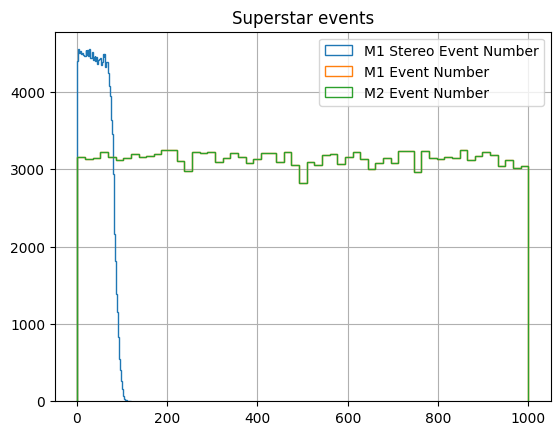

In [ ]:
n_bins = 59

stereo_evt_num = f['Events;7/MRawEvtHeader_1./MRawEvtHeader_1.fStereoEvtNumber'].array()
pd.Series(stereo_evt_num.to_numpy()).hist(bins=n_bins, histtype='step', label="M1 Stereo Event Number")

# same as event number!
# daq_event_num = f['Events;7/MRawEvtHeader_1./MRawEvtHeader_1.fDAQEvtNumber'].array()
# pd.Series(daq_event_num.to_numpy()).hist(bins=n_bins, histtype='step', label="M1 DAQ Event Number")

event_number = f['Events;7/MMcEvt_1./MMcEvt_1.fEvtNumber'].array()
ax = pd.Series(event_number.to_numpy()).hist(bins=n_bins, histtype='step', label="M1 Event Number")

# same as M1 event number
m2_event_number = f['Events;7/MMcEvt_2./MMcEvt_2.fEvtNumber'].array()
pd.Series(m2_event_number.to_numpy()).hist(bins=n_bins, histtype='step', label="M2 Event Number")



# add legend
plt.legend()
ax.set_title("Superstar events")

plt.show()

# conclusion: run number is not saved! only event number is saved
# need to match on other parameters: 
# MMcEvt_1:        
#     'fEvtNumber',
#     'fEnergy',
#     'fTheta',
#     'fPhi',
#     'fTelescopeTheta',
#     'fTelescopePhi',
#     'fZFirstInteraction',

In [118]:
# scan the file for all keys

import uproot.exceptions

for key in f.keys():
    
    print(f"\n----\nKEY {key}\n")

    for k, v in f[key].items():
        try:
            array = v.array(library="np")
            # check if you can index the array
            try:
                length = len(array)
            except TypeError:
                length = ".."
            try:
                shape = array.shape, array[0].shape
            except AttributeError:
                shape = ".."
            try:
                n_unique = len(np.unique(array))
            except TypeError:
                n_unique = ".."
            print(f"    {key}/{k}")
            print(f"        l=[{length}] // n_u={n_unique} // s={shape} // t={type(array)} // v0={array[0]}")
        except (KeyError, TypeError, ValueError, uproot.DeserializationError):
            if hasattr(v, "keys"):
                print()
                print(f"    {key}/{k}" + f"\n        KEYS: {len(v.keys())}")
            else:
                print(f"    {key}/{k}" + f"\n        {key}{v}")


----
KEY Events;7

    Events;7/MRawEvtHeader_1.

    Events;7/MRawEvtHeader_1.
        KEYS: 13
    Events;7/MRawEvtHeader_1./MRawEvtHeader_1.MParContainer

    Events;7/MRawEvtHeader_1./MRawEvtHeader_1.MParContainer
        KEYS: 3
    Events;7/MRawEvtHeader_1./MRawEvtHeader_1.MParContainer/MRawEvtHeader_1.MParContainer.TObject

    Events;7/MRawEvtHeader_1./MRawEvtHeader_1.MParContainer/MRawEvtHeader_1.MParContainer.TObject
        KEYS: 2
    Events;7/MRawEvtHeader_1./MRawEvtHeader_1.MParContainer/MRawEvtHeader_1.MParContainer.TObject/MRawEvtHeader_1.MParContainer.fUniqueID
        l=[185290] // n_u=1 // s=((185290,), ()) // t=<class 'numpy.ndarray'> // v0=0
    Events;7/MRawEvtHeader_1./MRawEvtHeader_1.MParContainer/MRawEvtHeader_1.MParContainer.TObject/MRawEvtHeader_1.MParContainer.fBits
        l=[185290] // n_u=1 // s=((185290,), ()) // t=<class 'numpy.ndarray'> // v0=50331648
    Events;7/MRawEvtHeader_1./MRawEvtHeader_1.fDAQEvtNumber
        l=[185290] // n_u=1000 // s=((185